In [2]:
from sympy import *

In [4]:
init_printing()

In [3]:
x, dx = var('x, \dot{x}')
m, k, c, g= var('m k c g')

In [5]:
T = Matrix([Rational(1, 2) * m * dx**2])
U = Matrix([Rational(1, 2) * k * ((x-1) * Heaviside(x-1))**2 +  - m * g * x])

In [6]:
D = T.jacobian(Matrix([dx])).jacobian(Matrix([dx]))
C = T.jacobian(Matrix([dx])).jacobian(Matrix([x]))
G = -(T - U).jacobian(Matrix([x])) 

In [7]:
f = Matrix([(- c * dx) * Heaviside(x-1)])

In [8]:
p = [m, k, c, g]
v = [x, dx]

In [9]:
D_mat = lambdify(p+v, D, modules=['numpy', 'sympy'])
G_mat = lambdify(p+v, G, modules=['numpy', 'sympy'])
f_mat = lambdify(p+v, f, modules=['numpy', 'sympy'])

In [10]:
ddq = D.inv().dot(-G+f)

In [11]:
ddq_mat = lambdify(v+p, ddq, modules=['numpy', 'sympy'])

In [12]:
p1 = [1, 1000, 1000, 9.8]
v1 = [0.0, 0]

In [13]:
v2 = [2.0, 0]

In [15]:
def foo(t, x, p):
    return np.array([x[1], ddq_mat(*(x+p))])

In [16]:
from scipy.integrate import odeint

In [17]:
import numpy as np

In [18]:
t = np.linspace(0, 10, 100)

In [19]:
sol = odeint(foo, t, v1, args=(p1,))

In [ ]:
y, dy = sol[0, :], sol[1, :]

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline

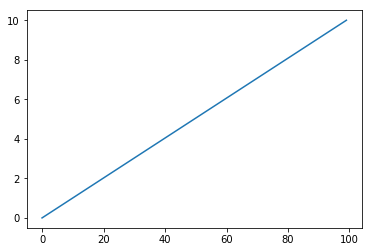

In [177]:
plt.plot(y)